# Build A Machine Learning Model To Predict Input Feature As An Output

- Here we are going for predicting three independent features, they are **Exposure Time, Light of delay, and Layer height** with the help of three features they are **variation in Length, Height and Width**.


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [117]:
df= pd.read_excel('1- DoE and Data.xlsx')

In [118]:
df.head()

,StdOrder,RunOrder,Layer Height,Exposure Time,Light Off Delay,Orientation,Time,Diameter,Length,Height 1,Square Pin Width,Square Pin Length,Height 2,Surface Roughness
0,35,1,0.050,2.25,12,Z,137,4.077,12.035,3.080,2.005,2.125,7.040,2.2
1,10,2,0.075,2.50,12,X,93,4.202,11.935,3.005,2.015,1.975,7.055,1.9
2,2,3,0.100,2.00,13,X,74,4.128,12.020,3.110,2.115,2.070,7.090,2.5
3,31,4,0.050,2.00,13,Z,143,4.148,11.970,3.100,1.975,2.070,7.010,2.0
4,36,5,0.100,2.25,12,Z,70,3.885,12.150,3.215,1.860,2.045,7.010,5.2


# Data Cleaning And Filteration

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StdOrder           45 non-null     int64  
 1   RunOrder           45 non-null     int64  
 2   Layer Height       45 non-null     float64
 3   Exposure Time      45 non-null     float64
 4   Light Off Delay    45 non-null     int64  
 5   Orientation        45 non-null     object 
 6   Time               45 non-null     int64  
 7   Diameter           45 non-null     float64
 8   Length             45 non-null     float64
 9   Height 1           45 non-null     float64
 10  Square Pin Width   45 non-null     float64
 11  Square Pin Length  45 non-null     float64
 12  Height 2           45 non-null     float64
 13  Surface Roughness  45 non-null     float64
dtypes: float64(9), int64(4), object(1)
memory usage: 5.0+ KB


In [120]:
np.sum(df.isna())

StdOrder             0
RunOrder             0
Layer Height         0
Exposure Time        0
Light Off Delay      0
Orientation          0
Time                 0
Diameter             0
Length               0
Height 1             0
Square Pin Width     0
Square Pin Length    0
Height 2             0
Surface Roughness    0
dtype: int64

In [121]:
df.columns

Index(['StdOrder', 'RunOrder', 'Layer Height', 'Exposure Time',
       'Light Off Delay', 'Orientation', 'Time', 'Diameter', 'Length',
       'Height 1', 'Square Pin Width', 'Square Pin Length', 'Height 2',
       'Surface Roughness'],
      dtype='object')

In [122]:
df.drop(['StdOrder', 'RunOrder','Time','Height 1', 'Square Pin Width', 'Square Pin Length'],axis=1,inplace=True)

In [123]:
df.head()

,Layer Height,Exposure Time,Light Off Delay,Orientation,Diameter,Length,Height 2,Surface Roughness
0,0.050,2.25,12,Z,4.077,12.035,7.040,2.2
1,0.075,2.50,12,X,4.202,11.935,7.055,1.9
2,0.100,2.00,13,X,4.128,12.020,7.090,2.5
3,0.050,2.00,13,Z,4.148,11.970,7.010,2.0
4,0.100,2.25,12,Z,3.885,12.150,7.010,5.2


In [124]:
df1=df.copy()

In [125]:
df1['Diameter']=df1['Diameter']-4
df1['Length']=df1['Length']-12
df1['Height 2']=df1['Height 2']-7


In [126]:
df1.head()

,Layer Height,Exposure Time,Light Off Delay,Orientation,Diameter,Length,Height 2,Surface Roughness
0,0.050,2.25,12,Z,0.077,0.035,0.040,2.2
1,0.075,2.50,12,X,0.202,-0.065,0.055,1.9
2,0.100,2.00,13,X,0.128,0.020,0.090,2.5
3,0.050,2.00,13,Z,0.148,-0.030,0.010,2.0
4,0.100,2.25,12,Z,-0.115,0.150,0.010,5.2


In [127]:
cols= ['Diameter', 'Length', 'Height 2']
for i in cols:
    try:
        df1.drop(df1[df1[i]==0].index[0],axis=0,inplace=True)
    except:
        df1

In [128]:
df1.rename(columns={'Layer Height':'lr_h','Exposure Time':'exp_t','Light Off Delay':'lod','Orientation':'orient',
                   'Diameter':'D1','Length':'L1','Height 2':'H2'},inplace=True)

In [129]:
df1.columns

Index(['lr_h', 'exp_t', 'lod', 'orient', 'D1', 'L1', 'H2',
       'Surface Roughness'],
      dtype='object')

In [130]:
df1.head()

,lr_h,exp_t,lod,orient,D1,L1,H2,Surface Roughness
0,0.050,2.25,12,Z,0.077,0.035,0.040,2.2
1,0.075,2.50,12,X,0.202,-0.065,0.055,1.9
2,0.100,2.00,13,X,0.128,0.020,0.090,2.5
3,0.050,2.00,13,Z,0.148,-0.030,0.010,2.0
4,0.100,2.25,12,Z,-0.115,0.150,0.010,5.2


# Data Visualisation and Prediction

# Linear Regression model 


In [131]:
x= df1[['D1','L1', 'H2']]
y= df1.lr_h

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_model =LinearRegression()

lr_model.fit(x_train,y_train)
y_pred=lr_model.predict([[0,0,0]])
test_dataframe= {}
MSE=mean_squared_error(y_test,lr_model.predict(x_test))
test_dataframe['linear regression']=MSE, y_pred[0]
MSE, y_pred

(0.00028007441453849126, array([0.07835812]))

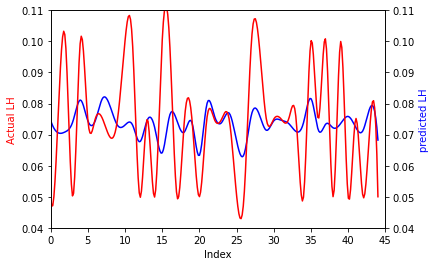

<Figure size 720x1080 with 0 Axes>

In [132]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
y_pred=lr_model.predict(x)
y= y_pred
x= df1.index
y1= df1.lr_h.values
xnew = np.linspace(x.min(), x.max(), 300)
  
gfg1 = make_interp_spline(x, y, k=3)
gfg2= make_interp_spline(x,y1,k=3)
y = gfg1(xnew)
y1= gfg2(xnew)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(xnew, y,'-b')
ax2.plot(xnew, y1, color="red" )
ax1.set_ylim(0.04,0.11)
ax2.set_ylim(0.04,0.11)
ax1.set_xlim(0,45)
ax1.set_xlabel('Index')
ax1.set_ylabel('Actual LH', color='r')
ax2.set_ylabel('predicted LH', color='b')
plt.show();

# Ridge Regression

In [133]:
x= df1[['D1','L1', 'H2']]
y= df1.lr_h

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
ridge_reg_model =Ridge()

ridge_reg_model.fit(x_train,y_train)
y_pred=ridge_reg_model.predict([[0,0,0]])
MSE=mean_squared_error(y_test,ridge_reg_model.predict(x_test))
test_dataframe['ridge regression']=MSE, y_pred[0]
MSE, y_pred

(0.00033618658837323336, array([0.07373719]))

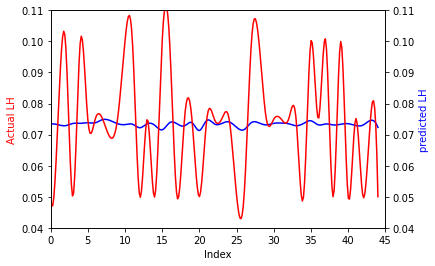

<Figure size 720x1080 with 0 Axes>

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
y_pred=ridge_reg_model.predict(x)
y= y_pred
x= df1.index
y1= df1.lr_h.values
xnew = np.linspace(x.min(), x.max(), 300)
  
gfg1 = make_interp_spline(x, y, k=3)
gfg2= make_interp_spline(x,y1,k=3)
y = gfg1(xnew)
y1= gfg2(xnew)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(xnew, y,'-b')
ax2.plot(xnew, y1, color="red" )
ax1.set_ylim(0.04,0.11)
ax2.set_ylim(0.04,0.11)
ax1.set_xlim(0,45)
ax1.set_xlabel('Index')
ax1.set_ylabel('Actual LH', color='r')
ax2.set_ylabel('predicted LH', color='b')
plt.show();

# DecisionTreeRegression

In [135]:
x= df1[['D1','L1', 'H2']]
y= df1.lr_h

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
dec_tree_model =DecisionTreeRegressor()

dec_tree_model.fit(x_train,y_train)
y_pred=dec_tree_model.predict([[0,0,0]])
MSE=mean_squared_error(y_test,dec_tree_model.predict(x_test))
test_dataframe['decision tree regressor']=MSE, y_pred[0]
MSE, y_pred

(0.00038461538461538456, array([0.1]))

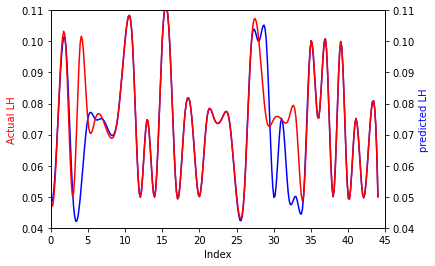

<Figure size 720x1080 with 0 Axes>

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
y_pred=dec_tree_model.predict(x)
y= y_pred
x= df1.index
y1= df1.lr_h.values
xnew = np.linspace(x.min(), x.max(), 300)
  
gfg1 = make_interp_spline(x, y, k=3)
gfg2= make_interp_spline(x,y1,k=3)
y = gfg1(xnew)
y1= gfg2(xnew)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(xnew, y,'-b')
ax2.plot(xnew, y1, color="red" )
ax1.set_ylim(0.04,0.11)
ax2.set_ylim(0.04,0.11)
ax1.set_xlim(0,45)
ax1.set_xlabel('Index')
ax1.set_ylabel('Actual LH', color='r')
ax2.set_ylabel('predicted LH', color='b')
plt.show();

# RandomForestRegressor

In [137]:
x= df1[['D1','L1', 'H2']]
y= df1.lr_h

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
random_forest =RandomForestRegressor()

random_forest.fit(x_train,y_train)
y_pred=random_forest.predict([[0,0,0]])
MSE=mean_squared_error(y_test,random_forest.predict(x_test))
test_dataframe['random forest regressor']=MSE, y_pred[0]
MSE, y_pred

(0.00023442788461538525, array([0.091]))

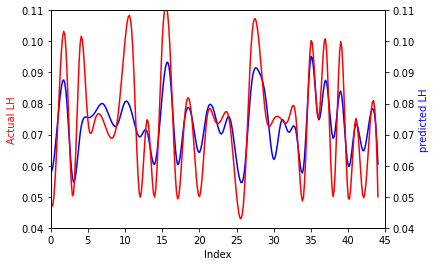

<Figure size 720x1080 with 0 Axes>

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
y_pred=random_forest.predict(x)
y= y_pred
x= df1.index
y1= df1.lr_h.values
xnew = np.linspace(x.min(), x.max(), 300)
  
gfg1 = make_interp_spline(x, y, k=3)
gfg2= make_interp_spline(x,y1,k=3)
y = gfg1(xnew)
y1= gfg2(xnew)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(xnew, y,'-b')
ax2.plot(xnew, y1, color="red" )
ax1.set_ylim(0.04,0.11)
ax2.set_ylim(0.04,0.11)
ax1.set_xlim(0,45)
ax1.set_xlabel('Index')
ax1.set_ylabel('Actual LH', color='r')
ax2.set_ylabel('predicted LH', color='b')
plt.show();

# DNN Model

In [139]:
import tensorflow as tf
from tensorflow import keras

In [140]:
dnn_model= keras.Sequential([
    keras.layers.Dense(3,input_shape=(3,),activation='relu'),
    keras.layers.Dense(2,activation='tanh'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [141]:
dnn_model.compile(keras.optimizers.SGD(),
                 keras.losses.mean_squared_error)

In [142]:
x= df1[['D1','L1', 'H2']]
y= df1.lr_h

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
dnn_model.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 327ms/step - loss: 0.1658
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1641
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1624
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1608
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1592
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1576
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1560
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1544
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1529
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1513
Epoch 11/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1498
Epoch 12/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1483
Epoch 13/1000
1/1 [============================

1/1 [==============================] - 0s 3ms/step - loss: 0.0668
Epoch 104/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0663
Epoch 105/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0659
Epoch 106/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0654
Epoch 107/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0649
Epoch 108/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0645
Epoch 109/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0640
Epoch 110/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0636
Epoch 111/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0631
Epoch 112/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0627
Epoch 113/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 114/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0618
Epoch 115/1000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0361
Epoch 205/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0359
Epoch 206/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0357
Epoch 207/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0355
Epoch 208/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0353
Epoch 209/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0352
Epoch 210/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0350
Epoch 211/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0348
Epoch 212/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 213/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0345
Epoch 214/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0343
Epoch 215/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0341
Epoch 216/1000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0229
Epoch 306/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0228
Epoch 307/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0228
Epoch 308/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0227
Epoch 309/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0226
Epoch 310/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0225
Epoch 311/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0224
Epoch 312/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0223
Epoch 313/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0222
Epoch 314/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0221
Epoch 315/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0221
Epoch 316/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0220
Epoch 317/1000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0161
Epoch 407/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0160
Epoch 408/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0160
Epoch 409/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0159
Epoch 410/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 411/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0158
Epoch 412/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 413/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 414/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157
Epoch 415/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0156
Epoch 416/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0156
Epoch 417/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0155
Epoch 418/1000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.0119
Epoch 508/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 509/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 510/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 511/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0118
Epoch 512/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 513/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0118
Epoch 514/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0117
Epoch 515/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 516/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0117
Epoch 517/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0116
Epoch 518/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0116
Epoch 519/1000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.0093
Epoch 609/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0093
Epoch 610/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0092
Epoch 611/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0092
Epoch 612/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 613/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0092
Epoch 614/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 615/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 616/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 617/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 618/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 619/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 620/1000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.0074
Epoch 710/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 711/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0074
Epoch 712/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 713/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0074
Epoch 714/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 715/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 716/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 717/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 718/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 719/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 720/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 721/1000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.0061
Epoch 811/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 812/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0061
Epoch 813/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0061
Epoch 814/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 815/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 816/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 817/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 818/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 819/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 820/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 821/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 822/1000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.0051
Epoch 912/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0051
Epoch 913/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 914/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 915/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0051
Epoch 916/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 917/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 918/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 919/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 920/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 921/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 922/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 923/1000
1/1 [=======================

In [143]:
MSE=dnn_model.evaluate(x_test,y_test)
y_pred=dnn_model.predict([[0,0,0]])

1/1 [==============================] - 0s 72ms/step


2/2 [==============================] - 0s 1ms/step


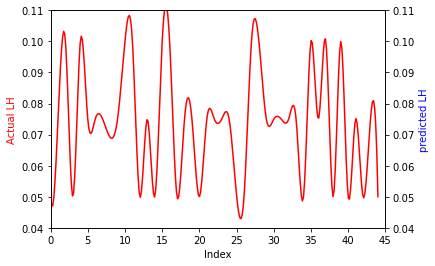

<Figure size 720x1080 with 0 Axes>

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
y_pred=dnn_model.predict(x)
y= y_pred
x= df1.index
y1= df1.lr_h.values
xnew = np.linspace(x.min(), x.max(), 300)
  
gfg1 = make_interp_spline(x, y, k=3)
gfg2= make_interp_spline(x,y1,k=3)
y = gfg1(xnew)
y1= gfg2(xnew)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(xnew, y,'-b')
ax2.plot(xnew, y1, color="red" )
ax1.set_ylim(0.04,0.11)
ax2.set_ylim(0.04,0.11)
ax1.set_xlim(0,45)
ax1.set_xlabel('Index')
ax1.set_ylabel('Actual LH', color='r')
ax2.set_ylabel('predicted LH', color='b')
plt.show();

In [145]:
test_df=pd.DataFrame(data=test_dataframe,index=['MSE_LH','Layer Height']).T
test_df

,MSE_LH,Layer Height
linear regression,0.000280,0.078358
ridge regression,0.000336,0.073737
decision tree regressor,0.000385,0.100000
random forest regressor,0.000234,0.091000


# Linear Regression model 
### Input parameters are - variation in Diameter, Length, Height
### Output parameter is Exposure Time

In [146]:
df1.exp_t=df1.exp_t/2.5

In [147]:
df1.head()

,lr_h,exp_t,lod,orient,D1,L1,H2,Surface Roughness
0,0.050,0.9,12,Z,0.077,0.035,0.040,2.2
1,0.075,1.0,12,X,0.202,-0.065,0.055,1.9
2,0.100,0.8,13,X,0.128,0.020,0.090,2.5
3,0.050,0.8,13,Z,0.148,-0.030,0.010,2.0
4,0.100,0.9,12,Z,-0.115,0.150,0.010,5.2


In [148]:
x= df1[['D1','L1', 'H2']]
y= df1.exp_t

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_model =LinearRegression()

lr_model.fit(x_train,y_train)
y_pred=lr_model.predict([[0,0,0]])*2.5
test_dataframe_exp_t= {}
MSE=mean_squared_error(y_test,lr_model.predict(x_test))
test_dataframe_exp_t['linear regression']=MSE, y_pred[0]
MSE, y_pred

(0.006012057632746802, array([2.18973365]))

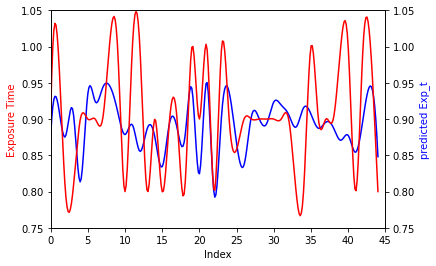

<Figure size 720x1080 with 0 Axes>

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
y_pred=lr_model.predict(x)
y= y_pred
x= df1.index
y1= df1.exp_t.values
xnew = np.linspace(x.min(), x.max(), 300)
  
gfg1 = make_interp_spline(x, y, k=3)
gfg2= make_interp_spline(x,y1,k=3)
y = gfg1(xnew)
y1= gfg2(xnew)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(xnew, y,'-b')
ax2.plot(xnew, y1, color="red" )
ax1.set_ylim(0.75,1.05)
ax2.set_ylim(0.75,1.05)
ax1.set_xlim(0,45)
ax1.set_xlabel('Index')
ax1.set_ylabel('Exposure Time', color='r')
ax2.set_ylabel('predicted Exp_t', color='b')
plt.show();

# Ridge Regression

In [150]:
x= df1[['D1','L1', 'H2']]
y= df1.exp_t

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
ridge_reg_model =Ridge()

ridge_reg_model.fit(x_train,y_train)
y_pred=ridge_reg_model.predict([[0,0,0]])*2.5
MSE=mean_squared_error(y_test,ridge_reg_model.predict(x_test))
test_dataframe_exp_t['ridge regression']=MSE, y_pred[0]
MSE, y_pred

(0.005288383077735191, array([2.22772598]))

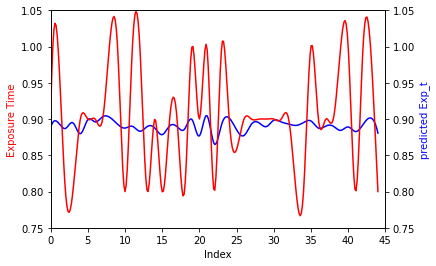

<Figure size 720x1080 with 0 Axes>

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
y_pred=ridge_reg_model.predict(x)
y= y_pred
x= df1.index
y1= df1.exp_t.values
xnew = np.linspace(x.min(), x.max(), 300)
  
gfg1 = make_interp_spline(x, y, k=3)
gfg2= make_interp_spline(x,y1,k=3)
y = gfg1(xnew)
y1= gfg2(xnew)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(xnew, y,'-b')
ax2.plot(xnew, y1, color="red" )
ax1.set_ylim(0.75,1.05)
ax2.set_ylim(0.75,1.05)
ax1.set_xlim(0,45)
ax1.set_xlabel('Index')

ax1.set_ylabel('Exposure Time', color='r')
ax2.set_ylabel('predicted Exp_t', color='b')
plt.show();

# DecisionTreeRegression

In [152]:
x= df1[['D1','L1', 'H2']]
y= df1.exp_t

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
dec_tree_model =DecisionTreeRegressor()

dec_tree_model.fit(x_train,y_train)
y_pred=dec_tree_model.predict([[0,0,0]])*2.5
MSE=mean_squared_error(y_test,dec_tree_model.predict(x_test))
test_dataframe_exp_t['decision tree regressor']=MSE, y_pred[0]
MSE, y_pred

(0.006923076923076919, array([2.5]))

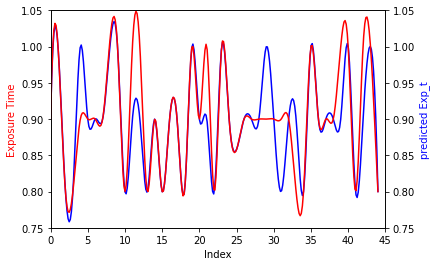

<Figure size 720x1080 with 0 Axes>

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
y_pred=dec_tree_model.predict(x)
y= y_pred
x= df1.index
y1= df1.exp_t.values
xnew = np.linspace(x.min(), x.max(), 300)
  
gfg1 = make_interp_spline(x, y, k=3)
gfg2= make_interp_spline(x,y1,k=3)
y = gfg1(xnew)
y1= gfg2(xnew)
fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(xnew, y,'-b')
ax2.plot(xnew, y1, color="red" )
ax1.set_ylim(0.75,1.05)
ax2.set_ylim(0.75,1.05)
ax1.set_xlim(0,45)
ax1.set_xlabel('Index')
ax1.set_ylabel('Exposure Time', color='r')
ax2.set_ylabel('predicted Exp_t', color='b')
plt.show();

# RandomForestRegressor

In [154]:
x= df1[['D1','L1', 'H2']]
y= df1.exp_t

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
random_forest =RandomForestRegressor()

random_forest.fit(x_train,y_train)
y_pred=random_forest.predict([[0,0,0]])*2.5
MSE=mean_squared_error(y_test,random_forest.predict(x_test))
test_dataframe_exp_t['random forest regressor']=MSE, y_pred[0]
MSE, y_pred

(0.008572230769230813, array([2.4125]))

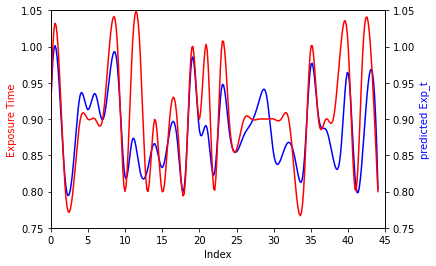

<Figure size 720x1080 with 0 Axes>

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
y_pred=random_forest.predict(x)
y= y_pred
x= df1.index
y1= df1.exp_t.values
xnew = np.linspace(x.min(), x.max(), 300)
  
gfg1 = make_interp_spline(x, y, k=3)
gfg2= make_interp_spline(x,y1,k=3)
y = gfg1(xnew)
y1= gfg2(xnew)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(xnew, y,'-b')
ax2.plot(xnew, y1, color="red" )
ax1.set_ylim(0.75,1.05)
ax2.set_ylim(0.75,1.05)
ax1.set_xlim(0,45)
ax1.set_xlabel('Index')
ax1.set_ylabel('Exposure Time', color='r')
ax2.set_ylabel('predicted Exp_t', color='b')
plt.show();

In [156]:
test_df_exp_t= pd.DataFrame(data=test_dataframe_exp_t,index=['MSE_ET','Exposure Time']).T
test_df_exp_t

,MSE_ET,Exposure Time
linear regression,0.006012,2.189734
ridge regression,0.005288,2.227726
decision tree regressor,0.006923,2.500000
random forest regressor,0.008572,2.412500


# Linear Regression model 
### Input parameters are - variation in Diameter, Length, Height
### Output parameter is Light Off Delay

In [157]:
df1.lod=df1.lod/14

In [172]:
x= df1[['D1','L1', 'H2']]
y= df1.lod

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_model =LinearRegression()

lr_model.fit(x_train,y_train)
y_pred=lr_model.predict([[0,0,0]])*14
test_dataframe_lod= {}
MSE=mean_squared_error(y_test,lr_model.predict(x_test))
test_dataframe_lod['linear regression']=MSE, y_pred[0]
MSE, y_pred

(0.0018230749149106748, array([12.8106254]))

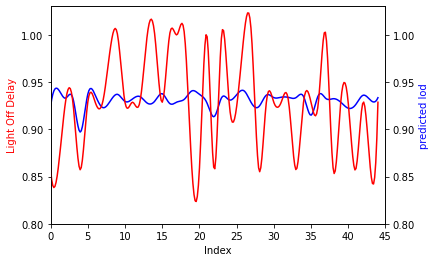

<Figure size 720x1080 with 0 Axes>

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
y_pred=lr_model.predict(x)
y= y_pred
x= df1.index
y1= df1.lod.values
xnew = np.linspace(x.min(), x.max(), 300)
  
gfg1 = make_interp_spline(x, y, k=3)
gfg2= make_interp_spline(x,y1,k=3)
y = gfg1(xnew)
y1= gfg2(xnew)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(xnew, y,'-b')
ax2.plot(xnew, y1, color="red" )
ax1.set_ylim(0.8,1.03)
ax2.set_ylim(0.8,1.03)
ax1.set_xlim(0,45)
ax1.set_xlabel('Index')
ax1.set_ylabel('Light Off Delay', color='r')
ax2.set_ylabel('predicted lod', color='b')
plt.show();

# Ridge Regression

In [174]:
x= df1[['D1','L1', 'H2']]
y= df1.lod

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
ridge_reg_model =Ridge()

ridge_reg_model.fit(x_train,y_train)
y_pred=ridge_reg_model.predict([[0,0,0]])*14
MSE=mean_squared_error(y_test,ridge_reg_model.predict(x_test))
test_dataframe_lod['ridge regression']=MSE, y_pred[0]
MSE, y_pred

(0.0019859868281547053, array([13.02174144]))

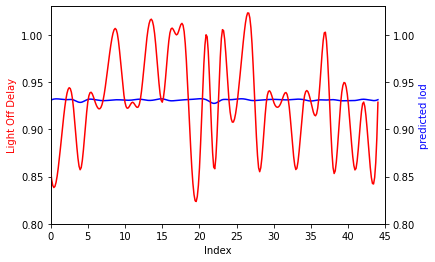

<Figure size 720x1080 with 0 Axes>

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
y_pred=ridge_reg_model.predict(x)
y= y_pred
x= df1.index
y1= df1.lod.values
xnew = np.linspace(x.min(), x.max(), 300)
  
gfg1 = make_interp_spline(x, y, k=3)
gfg2= make_interp_spline(x,y1,k=3)
y = gfg1(xnew)
y1= gfg2(xnew)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(xnew, y,'-b')
ax2.plot(xnew, y1, color="red" )
ax1.set_ylim(0.8,1.03)
ax2.set_ylim(0.8,1.03)
ax1.set_xlim(0,45)
ax1.set_xlabel('Index')
ax1.set_ylabel('Light Off Delay', color='r')
ax2.set_ylabel('predicted lod', color='b')
plt.show();

# DecisionTreeRegressor

In [176]:
x= df1[['D1','L1', 'H2']]
y= df1.lod

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
dec_tree_model =DecisionTreeRegressor()

dec_tree_model.fit(x_train,y_train)
y_pred=dec_tree_model.predict([[0,0,0]])*14
MSE=mean_squared_error(y_test,dec_tree_model.predict(x_test))
test_dataframe_lod['decision tree regressor']=MSE, y_pred[0]
MSE, y_pred

(0.002354788069073784, array([13.]))

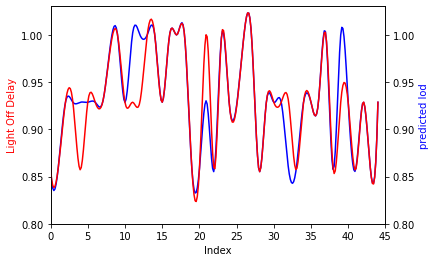

<Figure size 720x1080 with 0 Axes>

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
y_pred=dec_tree_model.predict(x)
y= y_pred
x= df1.index
y1= df1.lod.values
xnew = np.linspace(x.min(), x.max(), 300)
  
gfg1 = make_interp_spline(x, y, k=3)
gfg2= make_interp_spline(x,y1,k=3)
y = gfg1(xnew)
y1= gfg2(xnew)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(xnew, y,'-b')
ax2.plot(xnew, y1, color="red" )
ax1.set_ylim(0.8,1.03)
ax2.set_ylim(0.8,1.03)
ax1.set_xlim(0,45)
ax1.set_xlabel('Index')
ax1.set_ylabel('Light Off Delay', color='r')
ax2.set_ylabel('predicted lod', color='b')
plt.show();

# RandomForest

In [178]:
x= df1[['D1','L1', 'H2']]
y= df1.lod

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
random_forest =RandomForestRegressor()

random_forest.fit(x_train,y_train)
y_pred=random_forest.predict([[0,0,0]])*14
MSE=mean_squared_error(y_test,random_forest.predict(x_test))
test_dataframe_lod['random forest regressor']=MSE, y_pred[0]
MSE, y_pred

(0.0017244505494505593, array([12.71]))

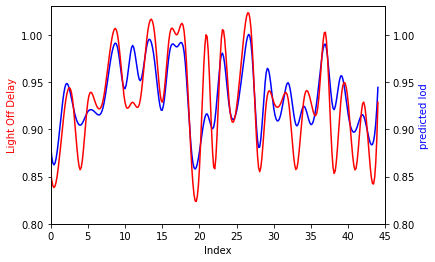

<Figure size 720x1080 with 0 Axes>

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
y_pred=random_forest.predict(x)
y= y_pred
x= df1.index
y1= df1.lod.values
xnew = np.linspace(x.min(), x.max(), 300)
  
gfg1 = make_interp_spline(x, y, k=3)
gfg2= make_interp_spline(x,y1,k=3)
y = gfg1(xnew)
y1= gfg2(xnew)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(xnew, y,'-b')
ax2.plot(xnew, y1, color="red" )
ax1.set_ylim(0.8,1.03)
ax2.set_ylim(0.8,1.03)
ax1.set_xlim(0,45)
ax1.set_xlabel('Index')
ax1.set_ylabel('Light Off Delay', color='r')
ax2.set_ylabel('predicted lod', color='b')
plt.show();

In [180]:
test_df_lod= pd.DataFrame(data=test_dataframe_lod,index=['MSE_LOD','Light Off Delay']).T
test_df_lod

,MSE_LOD,Light Off Delay
linear regression,0.001823,12.810625
ridge regression,0.001986,13.021741
decision tree regressor,0.002355,13.000000
random forest regressor,0.001724,12.710000


In [181]:
pd.concat([test_df,test_df_exp_t,test_df_lod],axis=1)

,MSE_LH,Layer Height,MSE_ET,Exposure Time,MSE_LOD,Light Off Delay
linear regression,0.000280,0.078358,0.006012,2.189734,0.001823,12.810625
ridge regression,0.000336,0.073737,0.005288,2.227726,0.001986,13.021741
decision tree regressor,0.000385,0.100000,0.006923,2.500000,0.002355,13.000000
random forest regressor,0.000234,0.091000,0.008572,2.412500,0.001724,12.710000


In [182]:
df1.head()

,lr_h,exp_t,lod,orient,D1,L1,H2,Surface Roughness
0,0.050,0.9,0.857143,Z,0.077,0.035,0.040,2.2
1,0.075,1.0,0.857143,X,0.202,-0.065,0.055,1.9
2,0.100,0.8,0.928571,X,0.128,0.020,0.090,2.5
3,0.050,0.8,0.928571,Z,0.148,-0.030,0.010,2.0
4,0.100,0.9,0.857143,Z,-0.115,0.150,0.010,5.2
